In [1]:
from impedance.models.circuits import CustomCircuit
from impedance import preprocessing

frequencies, Z = preprocessing.readBioLogic("MPT files/1_00V_10cyc.mpt")

circuit = 'R0-p(R1,C1)-p(R2,C2)'
initial_guess = [1., 1., 1e-6, 1.e5, 1e-6]
circuit = CustomCircuit(circuit, initial_guess=initial_guess)

circuit.fit(frequencies, Z)
Z_fit = circuit.predict(frequencies)
print (circuit)


Circuit string: R0-p(R1,C1)-p(R2,C2)
Fit: True

Initial guesses:
     R0 = 1.00e+00 [Ohm]
     R1 = 1.00e+00 [Ohm]
     C1 = 1.00e-06 [F]
     R2 = 1.00e+05 [Ohm]
     C2 = 1.00e-06 [F]

Fit parameters:
     R0 = 1.22e+01  (+/- 1.41e-01) [Ohm]
     R1 = 3.06e+01  (+/- 4.33e+00) [Ohm]
     C1 = 3.05e-03  (+/- 1.77e-04) [F]
     R2 = 5.79e+05  (+/- 1.26e+06) [Ohm]
     C2 = 2.00e-04  (+/- 7.91e-07) [F]



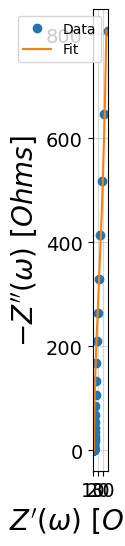

In [4]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

plt.rcParams['figure.figsize'] = [12, 6]
fig, ax1 = plt.subplots()

#import matplotlib.gridspec as gridspec
#fig = plt.figure(figsize=(12, 6))  # 12 inches wide by 6 inches tall
#gs = gridspec.GridSpec(1, 1, left=0.1, right=0.9, top=0.9, bottom=0.1)
#ax1 = fig.add_subplot(gs[0])

plot_nyquist(Z, fmt='o', scale=1, ax=ax1)
plot_nyquist(Z_fit, fmt='-', scale=1, ax=ax1)

plt.legend(['Data', 'Fit'])
plt.show()